# Diabetes IA
# Es hacer la exploración y análisis de datos (EDA)
  - Observación

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/diabetes.csv')#Crear el dataframe en Pandas desde el Dataset
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
data.head() # Primeros 5 registros

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data.tail() # Últimos 5 registros

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
data.describe() # Información estadística de los datos

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

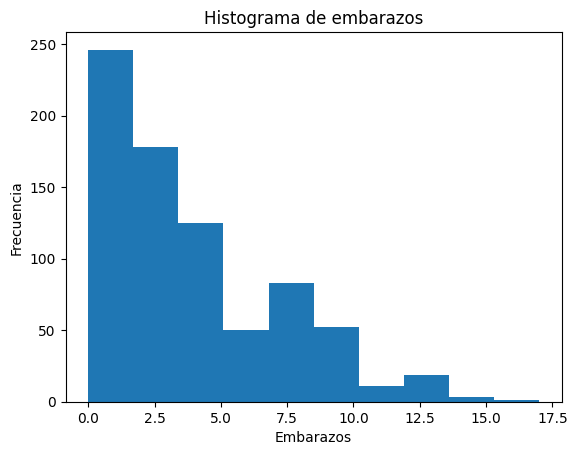

In [ ]:
plt.hist(data['Pregnancies'])
plt.title('Histograma de embarazos')
plt.xlabel('Embarazos')
plt.ylabel('Frecuencia')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

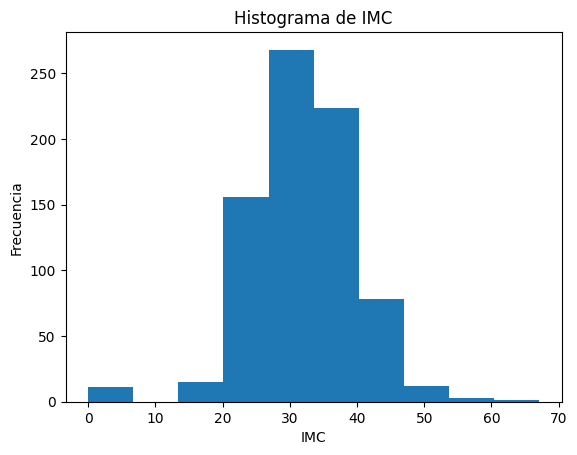

In [ ]:
plt.hist(data['BMI'])
plt.title('Histograma de IMC')
plt.xlabel('IMC')
plt.ylabel('Frecuencia')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

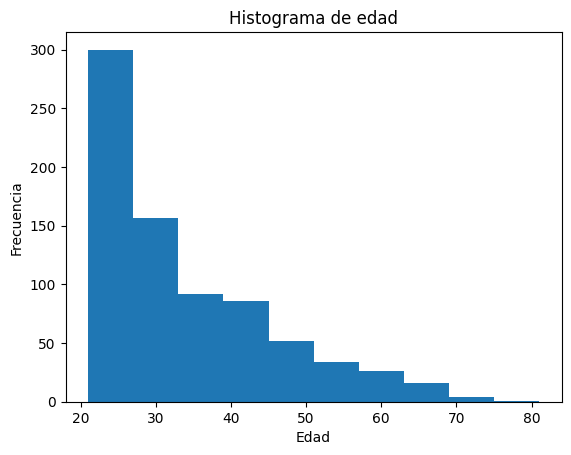

In [ ]:
plt.hist(data['Age'])
plt.title('Histograma de edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show

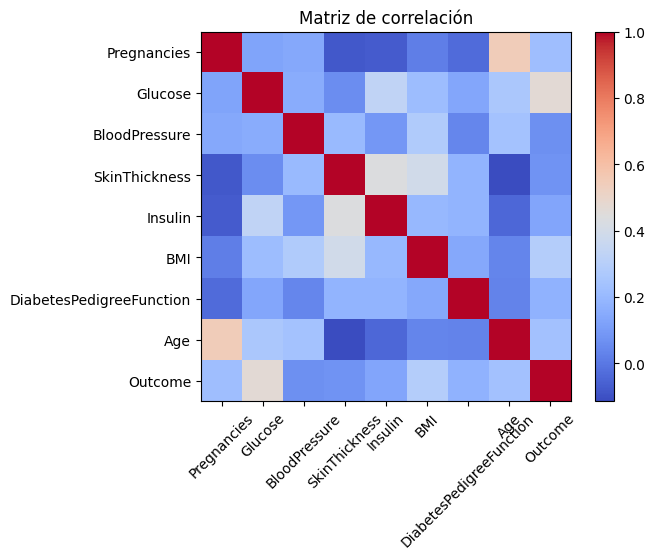

In [ ]:
#Matriz de correlación
matriz_correlacion = data.corr()
plt.imshow(matriz_correlacion, cmap = 'coolwarm', interpolation = 'nearest')
plt.colorbar()
plt.title('Matriz de correlación')
plt.xticks(range(len(matriz_correlacion.columns)), matriz_correlacion.columns, rotation=45)
plt.yticks(range(len(matriz_correlacion.columns)), matriz_correlacion.columns)
plt.show()

In [ ]:
corr_outcome = matriz_correlacion['Outcome'].abs().sort_values(ascending = False)
corr_outcome

,Outcome
Outcome,1.000000
Glucose,0.466581
BMI,0.292695
Age,0.238356
Pregnancies,0.221898
DiabetesPedigreeFunction,0.173844
Insulin,0.130548
SkinThickness,0.074752
BloodPressure,0.065068


#Hipotésis

In [ ]:
#Puliendo el dataframe
data_pulida = data.drop(columns=['SkinThickness','BloodPressure'])
data_pulida

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,0,33.6,0.627,50,1
1,1,85,0,26.6,0.351,31,0
2,8,183,0,23.3,0.672,32,1
3,1,89,94,28.1,0.167,21,0
4,0,137,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...
763,10,101,180,32.9,0.171,63,0
764,2,122,0,36.8,0.340,27,0
765,5,121,112,26.2,0.245,30,0
766,1,126,0,30.1,0.349,47,1


In [ ]:
#Preprocesamiento


#Experimento
División de datos y Entrenamiento

In [ ]:
x = data_pulida.drop(columns=['Outcome']).values
y = data_pulida['Outcome'].values

In [ ]:
'''
Dividir los datos
4 segmentos de datos
  x trian
  x test
  y train
  y test

  Para una buena división debemos tener 80%-70% de datos para entrenar y 20%-30% para probar/testear
'''
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
x_train

array([[  9.   , 145.   , 130.   ,  37.9  ,   0.637,  40.   ],
       [ 10.   , 129.   ,   0.   ,  41.2  ,   0.441,  38.   ],
       [  7.   , 102.   , 105.   ,  37.2  ,   0.204,  45.   ],
       ...,
       [ 13.   , 126.   ,   0.   ,  43.4  ,   0.583,  42.   ],
       [  4.   , 171.   ,   0.   ,  43.6  ,   0.479,  26.   ],
       [  9.   , 102.   ,   0.   ,  32.9  ,   0.665,  46.   ]])

Vamos a usar Regresión

ML supervisado
-Regresión: Cuando quieres predecir un valor continuo(inf a -inf)
-Clasificación: Cuando quieres predecir valores discretos

In [ ]:
#El escalamiento siempre va en x y el atrget no se toca
scaler = StandardScaler()
x_train_escalada = scaler.fit_transform(x_train)
x_test_escalada = scaler.transform(x_test)
x_train_escalada

array([[ 1.51659096,  0.75052361,  0.43749607,  0.79582546,  0.52952571,
         0.56793202],
       [ 1.81201827,  0.24475163, -0.67847404,  1.22865369, -0.06968859,
         0.39844951],
       [ 0.92573636, -0.60873859,  0.22288644,  0.70401341, -0.79424873,
         0.99163829],
       ...,
       [ 2.69830017,  0.14991938, -0.67847404,  1.51720584,  0.36443605,
         0.73741453],
       [ 0.03945446,  1.57240307, -0.67847404,  1.54343785,  0.04648561,
        -0.61844554],
       [ 1.51659096, -0.60873859, -0.67847404,  0.14002512,  0.61512775,
         1.07637954]])

In [ ]:
#Entrenamiento
model = LogisticRegression()
model.fit(x_train, y_train)
intercept = model.intercept_
intercept

array([-8.64328424])

In [ ]:
coef = model.coef_[0]
coef

array([ 0.11869299,  0.03629712, -0.00112965,  0.07710486,  0.66054356,
        0.00714148])

Análisis y evaluación de resultados

In [ ]:
y_pred = model.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0])

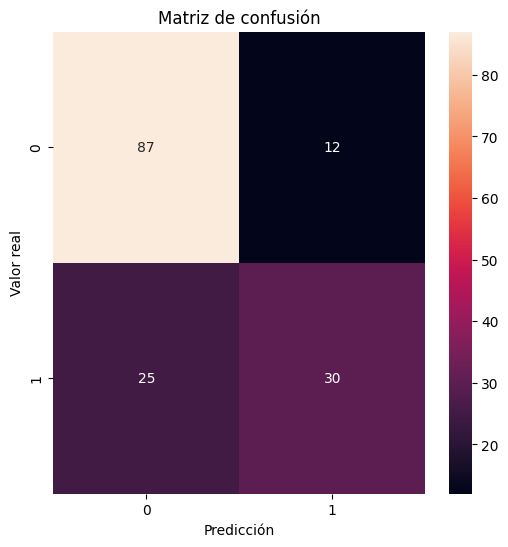

In [ ]:
matriz = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (6,6))
sns.heatmap(matriz, annot=True, fmt='d')
plt.xlabel('Predicción')
plt.ylabel('Valor real')
plt.title('Matriz de confusión')
plt.show()

In [ ]:
reporte = classification_report(y_test, y_pred) #F1 score ->1 mejor
print(reporte)#Precisión global del 76%

              precision    recall  f1-score   support

           0       0.78      0.88      0.82        99
           1       0.71      0.55      0.62        55

    accuracy                           0.76       154
   macro avg       0.75      0.71      0.72       154
weighted avg       0.75      0.76      0.75       154

